# IMPORT

In [1]:
import os
from os import path
from os import listdir
import glob
import pathlib
from astropy.io import fits
from operator import itemgetter, attrgetter
from shapely.geometry import box, Point 
from shapely.ops import unary_union
import shutil
import plotly.graph_objects as go
import numpy as np
from astropy.io import ascii
import math
from plotly.offline import plot
import plotly.figure_factory as ff
from astropy import wcs
from astropy.convolution import Gaussian2DKernel, convolve
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
np.set_printoptions(precision=2)
pd.set_option('display.max_rows', None)

# Define REGIONS numbers

In [4]:
# bad_regs is defined in individual fitting section
regs = [i for i in range(100) if i not in zeros+bad_regs]

## define regions with non-zero values

In [2]:
#regs=[11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88]
zeros = [0, 9, 80, 90, 91, 97, 99]

## define outer ring regions

In [638]:
out_regs = [i for i in range(10)] + [i*10 for i in range(1,10)] + [i+90 for i in range(1,10)] + [i*10+9 for i in range(1,10)]

## remove bad pointings and bad regs

In [131]:
# found bad pointing 0203362301 for reg 23
# only has data in 0-100 channels
# remove it

In [600]:
for reg in regs:
    if reg in bad_regs:
        regs.remove(reg)

In [42]:
# create a bad names dict
bad_names = {k:[] for k in range(100)}
bad_regs = []
# check if all new backgrnd files are produced
dest = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2'
for reg in range(100):
    DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{reg}'
    test_names = [f.split('-')[0] for f in listdir(DIR) if f.startswith('0')]
    test_names = sorted(list(set(test_names)))
    for name in test_names:
        old = f'/{name}-pnS005-back-phs1-reg{reg}.pi'
        new = f'/{name}-pnS005-back-phs1-reg{reg}-new.pi'
        if path.exists(dest+old) == False:
            print(reg,':',name)
            bad_names[reg].append(name)
bad_names[23].append('0203362301')
bad_names[20].append('0302352001') 
bad_names[20].append('0501170101')
bad_names[4].append('0203362301')
bad_names[15].append('0203362201')
bad_names[15].append('0203362301')
bad_names[38].append('0203361101')
bad_names[38].append('0203361601')
bad_names[39].append('0203361601')
bad_names[14].append('0203362301')    
bad_names[25].append('0203362301')
bad_names[25].append('0203362201')
bad_names[25].append('0203361801')
bad_names[16].append('0203362201')
bad_names[24].append('0203362301')    
bad_names[43].append('0203361401')
bad_names[43].append('0302353401')
bad_names[43].append('0203361301')
bad_names[43].append('0302351401')    
bad_names[37].append('0203361601')
bad_names[37].append('0302351601')
bad_names[37].append('0302351701')
bad_names[37].append('0203361701')   
bad_names[64].append('0203360801')
bad_names[64].append('0203360901')  
bad_names[83].append('0302350401') 
bad_names[28].append('0203361601')     
bad_names[73].append('0302350401')
bad_names[73].append('0302350901')
bad_names[73].append('0203360401')
bad_names[73].append('0203360901')
bad_names[73].append('0302353001')  
bad_names[29].append('0302351601')     
bad_names[47].append('0203361601')
bad_names[47].append('0203361201')
bad_names[47].append('0302351201')
bad_names[47].append('0203361101') 
bad_names[89].append('0302350101')  
bad_names[78].append('0302350101')
bad_names[78].append('0203360101')
bad_names[17].append('0203362201')
bad_names[48].append('0203361601')  
bad_names[27].append('0203361601')
bad_names[27].append('0203362201')
bad_names[7].append('0203362201')     
bad_names[26].append('0203362201')
bad_names[26].append('0203361701')
bad_names[26].append('0302351701')
bad_names[26].append('0302352201')   
bad_names[87].append('0302350101')
bad_names[87].append('0203360101')    
bad_names[74].append('0302350401')
bad_names[74].append('0302350301')
bad_names[74].append('0203360401')  
bad_names[82].append('0302350401')    
bad_names[67].append('0203360701')
bad_names[67].append('0302350101')
bad_names[67].append('0203360101')
bad_names[88].append('0302350101') 
bad_names[79].append('0302350101')
bad_names[40].append('0203362001')  
bad_names[34].append('0203362301')  
bad_names[35].append('0203362301')   
bad_names[66].append('0302350701')
bad_names[66].append('0203360701')
bad_names[66].append('0203360201') 
bad_names[66].append('0302350201')   
bad_names[63].append('0302350401') 
bad_names[72].append('0302350401')
bad_names[77].append('0302350101')
bad_names[13].append('0203362301')  
bad_names[42].append('0203361501')
bad_names[42].append('0302351501')
bad_names[85].append('0302350301')
bad_names[95].append('0302350201')
bad_names[54].append('0203361401')  
bad_names[31].append('0203362001')
bad_names[31].append('0203361501')
bad_names[84].append('0302350401')
bad_names[46].append('0203361701')
bad_names[71].append('0302350501')  
bad_names[41].append('0203362001')
bad_names[68].append('0302350101')
bad_names[36].append('0203361601')
bad_names[65].append('0203360701')   
bad_names[57].append('0203360701')
bad_names[57].append('0203361201')
bad_names[32].append('0203362001')
bad_names[86].append('0302353101')
bad_names[12].append('0203362501')
bad_names[52].append('0203361501')  
bad_names[22].append('0203362501')
bad_names[22].append('0203362001')

bad_regs.append(5)
bad_regs.append(10)
bad_regs.append(96)
bad_regs.append(20)
bad_regs.append(2)
bad_regs.append(89)
bad_regs.append(93)
bad_regs.append(4)
bad_regs.append(97)

1 : 0203362501
4 : 0302352301
20 : 0203362001
20 : 0203362501
31 : 0203362501
32 : 0203362501
56 : 0203360601
59 : 0203361101
67 : 0203361101
76 : 0302350301
95 : 0302350301


In [43]:
print('bad_names =',bad_names)

bad_names = {0: [], 1: ['0203362501'], 2: [], 3: [], 4: ['0302352301', '0203362301'], 5: [], 6: [], 7: ['0203362201'], 8: [], 9: [], 10: [], 11: [], 12: ['0203362501'], 13: ['0203362301'], 14: ['0203362301'], 15: ['0203362201', '0203362301'], 16: ['0203362201'], 17: ['0203362201'], 18: [], 19: [], 20: ['0203362001', '0203362501', '0302352001', '0501170101'], 21: [], 22: ['0203362501', '0203362001'], 23: ['0203362301'], 24: ['0203362301'], 25: ['0203362301', '0203362201', '0203361801'], 26: ['0203362201', '0203361701', '0302351701', '0302352201'], 27: ['0203361601', '0203362201'], 28: ['0203361601'], 29: ['0302351601'], 30: [], 31: ['0203362501', '0203362001', '0203361501'], 32: ['0203362501', '0203362001'], 33: [], 34: ['0203362301'], 35: ['0203362301'], 36: ['0203361601'], 37: ['0203361601', '0302351601', '0302351701', '0203361701'], 38: ['0203361101', '0203361601'], 39: ['0203361601'], 40: ['0203362001'], 41: ['0203362001'], 42: ['0203361501', '0302351501'], 43: ['0203361401', '03023

In [44]:
print('bad_regs =',bad_regs)

bad_regs = [5, 10, 96, 20, 2, 89, 93, 4, 97]


In [569]:
# get the scale factor of areas
dest = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2/'
df = pd.read_csv('/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/solid_angles.csv')
for reg in [22]:
    r = 15/60.
    DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{reg}'
    test_names = [f.split('-')[0] for f in listdir(DIR) if f.startswith('0')]
    test_names = sorted(list(set(test_names)))
    areas = [df.at[reg,name] for name in test_names if name not in bad_names[reg]]
    reg_area = (10/60)**2/3282.8
    scales = [area/areas[0] for area in areas]
    ratio = areas[0]/reg_area
    with open(dest+'scale-reg{}.txt'.format(reg),'wt') as f:
        print(*scales,file=f,sep='\n')
    with open(dest+'ratio-reg{}.txt'.format(reg),'wt') as f:
        print('{} : {}'.format(test_names[0],ratio),file=f)

In [598]:
%cat /raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2/scale-reg41.txt
%cat /raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2/ratio-reg41.txt

1.0
1.0576199188274136
0.8105272012281034
0.8187075473681998
0203361501 : 0.8255729156099333


In [135]:
# DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/23'
# bad_name = '0203362301'
# test_names = [f.split('-')[0] for f in listdir(DIR) if f.startswith('0')]
# test_names = sorted(list(set(test_names)))
# test_names.remove(bad_name)
# print(test_names)

['0203361901', '0203362401', '0302351801', '0302351901', '0302352301', '0302352501', '0302353201', '0302353301', '0501170201']


# Define Pointing Names

In [5]:
DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong'
names = [name for name in os.listdir(DIR) if '0' in name and len(name) == 10]
names.sort()
print(names, len(names))

['0203360101', '0203360201', '0203360301', '0203360401', '0203360501', '0203360601', '0203360701', '0203360801', '0203360901', '0203361001', '0203361101', '0203361201', '0203361301', '0203361401', '0203361501', '0203361601', '0203361701', '0203361801', '0203361901', '0203362001', '0203362101', '0203362201', '0203362301', '0203362401', '0203362501', '0302350101', '0302350201', '0302350301', '0302350401', '0302350501', '0302350601', '0302350701', '0302350801', '0302350901', '0302351001', '0302351101', '0302351201', '0302351301', '0302351401', '0302351501', '0302351601', '0302351701', '0302351801', '0302351901', '0302352001', '0302352201', '0302352301', '0302352401', '0302352501', '0302353001', '0302353101', '0302353201', '0302353301', '0302353401', '0501170101', '0501170201'] 56


## remove bad pointing 0302352401

In [6]:
if '0302352401' in names:
    names.remove('0302352401')

In [ ]:
for i in range(0,100):
    f = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}/0302352401-pnS005-obj-os-phs1-reg{i}.pi'
    if path.exists(f):
        os.remove(f)
    f = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}/0302352401-pnS005-back-phs1-reg{i}.pi'
    if path.exists(f):
        os.remove(f)
    f = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}/0302352401-pnS005-phs1-reg{i}.arf'
    if path.exists(f):
        os.remove(f)
    f = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}/0302352401-pnS005-phs1-reg{i}.rmf'
    if path.exists(f):
        os.remove(f)

# Define RA, DEC for REGIONS

In [5]:
ras,decs,coords=[],[],[]
for name in names:
    with fits.open(f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/pnS005-cheese.fits') as hdu:
        header=hdu[0].header
        ra=header['CRVAL1']
        dec=header['CRVAL2']
        ras.append(ra)
        decs.append(dec)
        coords.append([ra,dec])

In [6]:
ras.sort()
decs.sort()
print(ras[0],ras[-1],ras[-1]-ras[0])
print(decs[0],decs[-1],decs[-1]-decs[0])

149.601583 150.6315 1.0299169999999833
1.68194444 2.75447222 1.0725277799999997


In [7]:
sorted(coords, key=itemgetter(0,1))

[[149.601583, 2.48797222],
 [149.604875, 2.73788889],
 [149.615, 1.69841667],
 [149.61675, 2.19905556],
 [149.617083, 1.68194444],
 [149.617083, 2.18258333],
 [149.617333, 1.69988889],
 [149.617333, 1.93291667],
 [149.6175, 2.19830556],
 [149.631917, 1.93186111],
 [149.633708, 1.93225],
 [149.634, 2.433],
 [149.836875, 2.73786111],
 [149.849833, 1.68319444],
 [149.849833, 2.1825],
 [149.850542, 1.68333333],
 [149.854375, 2.48763889],
 [149.854458, 1.98819444],
 [149.85475, 2.73791667],
 [149.85525, 2.23727778],
 [149.866667, 2.44911111],
 [149.866833, 1.68241667],
 [149.866833, 1.94922222],
 [150.102417, 1.73758333],
 [150.103125, 2.25430556],
 [150.103958, 2.73797222],
 [150.104167, 2.23755556],
 [150.10475, 2.48797222],
 [150.105583, 1.98777778],
 [150.116583, 1.69791667],
 [150.116875, 2.69916667],
 [150.119792, 2.48777778],
 [150.12075, 1.98797222],
 [150.132932, 1.93180556],
 [150.336542, 1.73647222],
 [150.337167, 2.23838889],
 [150.348958, 2.68219444],
 [150.352708, 1.73730556],

## Center of Whole Field

In [59]:
print('the center is:',(ras[0]+ras[-1])/2,(decs[0]+decs[-1])/2)

the center is: 150.11654149999998 2.21820833


## Center of each region

In [8]:
centers=[]
ra_up=(ras[0]+ras[-1])/2+45/60.
ra_down=(ras[0]+ras[-1])/2-45/60.
dec_up=(decs[0]+decs[-1])/2+45/60.
dec_down=(decs[0]+decs[-1])/2-45/60.
for i in range(0,10):
    for j in range(0,10):
        centers.append((ra_down+i*10/60.,dec_down+j*10/60.))
centers

[(149.36654149999998, 1.46820833),
 (149.36654149999998, 1.6348749966666667),
 (149.36654149999998, 1.8015416633333332),
 (149.36654149999998, 1.96820833),
 (149.36654149999998, 2.1348749966666665),
 (149.36654149999998, 2.3015416633333334),
 (149.36654149999998, 2.46820833),
 (149.36654149999998, 2.6348749966666665),
 (149.36654149999998, 2.8015416633333334),
 (149.36654149999998, 2.96820833),
 (149.53320816666664, 1.46820833),
 (149.53320816666664, 1.6348749966666667),
 (149.53320816666664, 1.8015416633333332),
 (149.53320816666664, 1.96820833),
 (149.53320816666664, 2.1348749966666665),
 (149.53320816666664, 2.3015416633333334),
 (149.53320816666664, 2.46820833),
 (149.53320816666664, 2.6348749966666665),
 (149.53320816666664, 2.8015416633333334),
 (149.53320816666664, 2.96820833),
 (149.69987483333333, 1.46820833),
 (149.69987483333333, 1.6348749966666667),
 (149.69987483333333, 1.8015416633333332),
 (149.69987483333333, 1.96820833),
 (149.69987483333333, 2.1348749966666665),
 (149

In [65]:
with open('/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/region_radec_phs1.reg','at') as fout:
    for center in centers:
        print(center[0],center[1],file=fout)

In [80]:
# f = open('/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/region_radec_phs1.reg')
tempx,tempy=[],[]
# lines = f.readlines()
# for line in lines:
#     tempx.append(line.split()[0])
#     tempx.append(line.split()[1])
# f.close()
for line in open('/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/region_radec_phs1.reg'):
    tempx.append(line.split()[0])
    tempy.append(line.split()[1])

# Define FUNCTIONS

## region(cx,cy,hw,i)

In [7]:
def region(cx,cy,hw,i):
    """
    This function calculates corner coords of a box region
    
    Arguments:
    * cx: center x coord 
    * cy: center y coord
    * hw: halfwidth 
    * i: corner number
    """
    assert (0 < i <= 4), "region number must be in (1-4)" 
    if i == 1:
        detx = cx - hw
        dety = cy + hw
    elif i == 2:
        detx = cx + hw
        dety = cy + hw
    elif i == 3:
        detx = cx - hw
        dety = cy - hw
    elif i == 4:
        detx = cx + hw
        dety = cy - hw
    return detx, dety
    

## get_grids(infile)

In [8]:
def get_grids(infile):
    """Generate grid boxes
     
     Arguments:
    * centers: center ra, dec for grids
    * boxes: box coords for grids
    
    """
    centers, boxes = [], []
    for line in open(infile):
        centers.append((float(line.split()[0]),float(line.split()[1])))
    for center in centers:
        minx = center[0] - 5/60.
        miny = center[1] - 5/60.
        maxx = center[0] + 5/60.
        maxy = center[1] + 5/60.
        b = box(minx, miny, maxx, maxy)
        boxes.append(b)
    return centers, boxes

## test_file_exist(infile)

In [9]:
def test_file_exist(infile):
    """ Test if file exists or has content
     
     Arguments:
    * flag: 0 = file exists or has content
    * infile: file name
    
    """
    flag = 0
    if path.exists(infile) == False:
        with open('/raid2/dxb/xmm/analysis/COSMOS/sicong/scripts/error.log', 'at') as fout:
            print(infile, 'does not exists!', file=fout)
        flag = 1
    else:
        with open(infile, 'r') as f:
            lines = f.readlines()
        if len(lines) == 0:
            with open('/raid2/dxb/xmm/analysis/COSMOS/sicong/scripts/error.log', 'at') as fout:
                print(infile, 'does not have content!', file=fout)
            flag = 1 
    return flag

## standardize(arr)

In [10]:
def standardize(arr):
    """
    This function convert an numpy array to standard units(z-score)
    """
    ave = np.average(arr)
    std = np.std(arr)
    new_arr=np.zeros(len(arr))
    for i in range(len(arr)):
        new_ele = (arr[i]-ave)/std
        new_arr[i] = new_ele        
    return new_arr

## heatmap_values(regs,z)

In [11]:
def heatmap_values(regs,z):
    """
    This function produces array 'values',
    text array 'texts' for heatmap_plot and annotated_heatmap
    
    Arguments:
    * regs: valid regions
    * z: array for fitting parameters, such as EM, kT...
    """
    values = np.zeros((10,10))
    texts = np.empty((10,10),dtype=object)
    for x in range(10):
        for y in range(10):
            i = x*10+y
            if i in regs:
                index = regs.index(i)
                values[x][y] = z[index]
            texts[x][y] = str(int(i))
    return values, texts

## heatmap_plot
## (values,zmin=-1000,zmax=1000,ras,decs,title='heatmap',xaxis='x',yaxis='y')

In [71]:
def heatmap_plot(values,ras,decs,title='heatmap',xaxis='x',yaxis='y',zmin=-1000,zmax=1000):
    """
    This function plots heatmap
    
    Arguments:
    * values: data array for heatmap
    * zmin: min value to plot
    * zmax: max value to plot 
    * ras: ra array for x-axis ticks
    * decs: dec array for y-axis ticks
    * title: plot title
    * xaxis: x-axis label
    * yaxis: y-axis label
    """
    fig = go.Figure(data=go.Heatmap(
                        z=values,
                        #zmin=zmin,
                        #zmax=zmax,
                        x=ras,
                        y=decs))

    fig.update_layout(
        autosize=False,
        width=1000,
        height=1000,
        title=title,
        #title="Reduced Chi Square",
        xaxis_title=xaxis,
        yaxis_title=yaxis,
        xaxis = dict(
            tickmode = 'array',
            #tickvals = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950],
            tickvals = ras,
            ticktext = ras,
        ),
        yaxis = dict(
            tickmode = 'array',
            #tickvals = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950],
            tickvals = decs,
            ticktext = decs,
        )
    )

    plot(fig);

## annotated_heatmap
## (values,texts,ras,decs,zmin=-1000,zmax=1000,title='heatmap',xaxis='x',yaxis='y')

In [13]:
def annotated_heatmap(values,texts,ras,decs,zmin=-1000,zmax=1000,title='heatmap',xaxis='x',yaxis='y'):
    """
    This function plots annotated heatmap
    
    Arguments:
    * values: data array for heatmap
    * texts: annotation texts
    * zmin: min value to plot
    * zmax: max value to plot 
    * ras: ra array for x-axis ticks
    * decs: dec array for y-axis ticks
    * title: plot title
    * xaxis: x-axis label
    * yaxis: y-axis label
    """
    fig = ff.create_annotated_heatmap(z=values,x=ras,y=decs,annotation_text=texts,showscale=True)

    fig.update_layout(
        autosize=False,
        width=1000,
        height=1000,
        title=title,
        xaxis_title=xaxis,
        yaxis_title=yaxis,
        xaxis = dict(
            tickmode = 'array',
            #tickvals = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950],
            tickvals = ras,
            ticktext = ras,
        ),
        yaxis = dict(
            tickmode = 'array',
            #tickvals = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950],
            tickvals = decs,
            ticktext = decs,
        )
    )

    plot(fig);

## read_spectra(DIR, name, skiprows=3)

In [14]:
def read_spectra(DIR, name, skiprows=3):
    """
    This function reads qdp spectra files
    
    Arguments:
    * DIR: file directory
    * name: file name
    * skiprows: skip first number of rows
    """
    DIR = DIR
    cols = ['x','x_err','y','y_err','back','back_err']
    df = pd.read_table(path.join(DIR,name),skiprows=skiprows,names=cols,delimiter=' ')
    return df
    #df.head(10)

## plot_spectra(title,df)

In [15]:
def plot_spectra(title,df):
    """
    This function plot qdp spectra files
    from dataframe return from read_spectra
    Arguments:
    * title: title
    * df: pandas dataframe
    """
    fig, ax = plt.subplots(figsize=(10,6))
    ax.errorbar(df.x, df.y, xerr=df.x_err,yerr=df.y_err,fmt='.-',label='data')
    ax.errorbar(df.x, df.back, xerr=df.x_err,yerr=df.back_err,color='red',fmt='*-',label='background')
    ax.set_xlabel('Energy (keV)')
    ax.set_ylabel('Normalized Counts/s/keV')
    ax.set_title(title)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.grid()
    ax.legend()
    plt.show();

## read_fit(DIR,name,skiprows=3)

In [16]:
def read_fit(DIR,name,skiprows=3):
    """
    This function reads qdp spectra fitting files
    
    Arguments:
    * DIR: file directory
    * name: file name
    * skiprows: skip first number of rows
    """
    DIR = DIR
    cols = ['x','x_err','y','y_err','res','res_err','total','model']
    df = pd.read_table(path.join(DIR,name),skiprows=skiprows,names=cols,delimiter=' ')
    return df

## plot_model(title,df)

In [17]:
def plot_model(title,df):
    """
    This function plot qdp spectra fitting files
    from dataframe return from read_fitting
    Arguments:
    * title: title
    * df: pandas dataframe
    """
    fig, ax = plt.subplots(figsize=(10,6))
    ax.errorbar(df.x, df.y, xerr=df.x_err,yerr=df.y_err,fmt='.-',label='data')
    ax.errorbar(df.x, df.res, xerr=df.x_err,yerr=df.res_err,color='black',fmt='*-',label='background')
    ax.plot(df.x, df.model, label='model')
    ax.set_xlabel('Energy (keV)')
    ax.set_ylabel('Normalized Counts/s/keV')
    ax.set_title(title)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.grid()
    ax.legend()
    plt.show();

## combine_error

In [87]:
def combine_error(arr):
    """
    This function takes a numpy array of errors 
    and return the combined error
    Arguments:
    * arr: error array
    """
    error = np.sqrt(np.sum(np.square(arr)))/85
    return error

# Individual spectral fitting

## Fitting parameters are linked with solid angles in a region as scale factors

## define regions (for testing purpose)

In [229]:
regs = []
for reg in range(100):  
    DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{reg}'
    test_names = [f.split('-')[0] for f in listdir(DIR) if f.startswith('0')]
    test_names = sorted(list(set(test_names)))
    if test_names:
        regs.append(reg)
print(regs)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 98]


## Get solid angles

### check if pnS005-back-im-sky-400-7200-phs1-reg#.fits exist

In [198]:
if '0302352401' in names:
    names.remove('0302352401')

for name in names:
    p = pathlib.Path(f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis')
    lis = p/'reg-num-radec.lis'
    regs = [int(line) for line in open(lis,'r')]
    for reg in regs:
        f = pathlib.Path(f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/smooth-back-im-sky-400-7200-phs1-reg{reg}.fits')
        if f.exists() == False:
            print('!File not exists:', name, 'region',reg)
else:
    print('Test passed! All file exist.')

Test passed! All file exist.


### Use Gaussian kernel convolution to smooth the images for solid angles

In [197]:
g = Gaussian2DKernel(x_stddev=1,y_stddev=1,x_size=3,y_size=3)
for name in names:
    p = pathlib.Path(f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis')
    lis = p/'reg-num-radec.lis'
    regs = [int(line) for line in open(lis,'r')]
    for reg in regs:
        image_file = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/pnS005-back-im-sky-400-7200-phs1-reg{reg}.fits'
        with fits.open(image_file) as hdu:
            old_header = hdu[0].header
            old_data=hdu[0].data
        new_data = convolve(old_data,g)
        outfile = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/smooth-back-im-sky-400-7200-phs1-reg{reg}.fits'
        hdu = fits.PrimaryHDU(data=new_data,header=old_header)
        hdu.writeto(outfile, overwrite=True)

In [185]:
with fits.open(outfile) as hdu:
    print(hdu[0].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  900                                                  NAXIS2  =                  900                                                  COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H CONTENT = 'IMAGE   '                                                            TELESCOP= 'XMM     '           / mission name                                   INSTRUME= 'EPIC    '           / instrument name                                OBS_MODE= 'POINTING'           / obs mode: POINTING,SLEW, OR SCAN               RADECSYS= 'FK5     '           / Equatorial system reference                    EQUINOX =                 2000 / Equinox

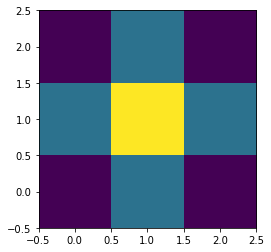

In [189]:
plt.imshow(g,interpolation='none',origin='lower')
#plt.colorbar()
plt.show()

### Sum the num of noe-zero pixels and calculate solid angles

In [199]:
def pixel_counter(image_file):
    """
    This function count all the nonzero pixels in an image file
    """
    with fits.open(image_file) as hdu:
        data = hdu[0].data
        x = np.count_nonzero(data)
    return x

In [200]:
def pixel_counter_smooth(image_file):
    """
    This function count all the pixels > 0.01 in an image file
    """
    with fits.open(image_file) as hdu:
        data = hdu[0].data
        x = np.count_nonzero(data > 0.01)
    return x

In [201]:
def pixel_to_sr(image_file,pixels):
    """
    This function convert pixels to solid angles
    """
    with fits.open(image_file) as hdu:
        header = hdu[0].header
        size = float(header['CDELT2'])
    deg2 = pixels*size**2
    factor = 3282.8
    sr = deg2 / factor
    return sr

In [202]:
# create a dataframe with all values = 0
nums = [i for i in range(100)]
data_arr = np.zeros((len(nums),len(names)))
df = pd.DataFrame(data=data_arr,columns=names,index=nums)

#calculate solid angles for each pointing
for name in names:
    p = pathlib.Path(f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis')
    lis = p/'reg-num-radec.lis'
    regs = [int(line) for line in open(lis,'r')]
    for reg in regs:
        image_file = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/smooth-back-im-sky-400-7200-phs1-reg{reg}.fits'
        x = pixel_counter(image_file)
        sr = pixel_to_sr(image_file,x)
        df.at[reg,name] = sr
#write to csv file
fout = '/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/solid_angles.csv'
df.to_csv(fout)

## check if solid_angles.csv is produced correctly

In [203]:
result = df.loc[23].to_numpy().nonzero()
for i in result[0]:
    print(names[i])

0203361901
0203362301
0203362401
0302351801
0302351901
0302352301
0302352501
0302353201
0302353301
0501170201


In [85]:
print(*test_names)

0203361901 0203362301 0203362401 0302351801 0302351901 0302352301 0302352501 0302353201 0302353301 0501170201


## testing if sum(exposures) == exposure-grp

In [12]:
%cd /raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/23
%ls

/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/23
0203361901-pnS005-back-phs1-reg23.pi
0203361901-pnS005-obj-os-phs1-reg23-grp.pi
0203361901-pnS005-obj-os-phs1-reg23.pi
0203361901-pnS005-phs1-reg23.arf
0203361901-pnS005-phs1-reg23.rmf
0203362301-pnS005-back-phs1-reg23-old.pi
0203362301-pnS005-back-phs1-reg23.pi
0203362301-pnS005-obj-os-phs1-reg23-grp.pi
0203362301-pnS005-obj-os-phs1-reg23.pi
0203362301-pnS005-phs1-reg23.arf
0203362301-pnS005-phs1-reg23.rmf
0203362401-pnS005-back-phs1-reg23-old.pi
0203362401-pnS005-back-phs1-reg23.pi
0203362401-pnS005-obj-os-phs1-reg23-grp.pi
0203362401-pnS005-obj-os-phs1-reg23.pi
0203362401-pnS005-phs1-reg23.arf
0203362401-pnS005-phs1-reg23.rmf
0302351801-pnS005-back-phs1-reg23.pi
0302351801-pnS005-obj-os-phs1-reg23-grp.pi
0302351801-pnS005-obj-os-phs1-reg23.pi
0302351801-pnS005-phs1-reg23.arf
0302351801-pnS005-phs1-reg23.rmf
0302351901-pnS005-back-phs1-reg23.pi
0302351901-pnS005-obj-os-phs1-reg23-grp.pi
0302351901-pnS005-obj-os-phs1-reg23.pi
03023

## Check correlation between count rate and area

In [133]:
exps=[]
counts=[]
DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/23'
for name in test_names:
    with fits.open(path.join(DIR,f'{name}-pnS005-obj-os-phs1-reg23-grp.pi')) as hdu:
        header=hdu[1].header
        data = hdu[1].data
        exps.append(int(header['EXPOSURE']))
        counts.append(np.sum(data['RATE'])/np.count_nonzero(data['RATE']))
        #counts.append(np.sum(data['RATE']))
with fits.open(path.join(DIR,'reg23-grp.pi')) as hdu:
    header=hdu[1].header
    exp=int(header['EXPOSURE'])
large_areas = np.array(areas)*1e6 
# print('exposure:',*exps)
# print('area:   ',np.round(large_areas,3))
# print('counts/s:',*counts)
df_rate = pd.DataFrame({'area':large_areas, 'count rate':counts,'exposure':exps})
df_rate

,area,count rate,exposure
0,5.702480,0.000576,19570
1,6.091479,0.000660,10996
2,0.416029,0.000139,14397
3,4.267385,0.000316,7672
4,1.855091,0.000411,2426
5,1.691882,0.000171,19204
6,5.940756,0.000582,7145
7,1.638262,0.000264,8104
8,1.962771,0.000137,21889


In [100]:
large_areas

[5.702479677312125,
 2.3620529324411783,
 6.091478754686603,
 0.4160292247449105,
 4.267384516106959,
 1.855090766270738,
 1.691881561224271,
 5.940756302501477,
 1.6382619754079244,
 1.9627706468279482]

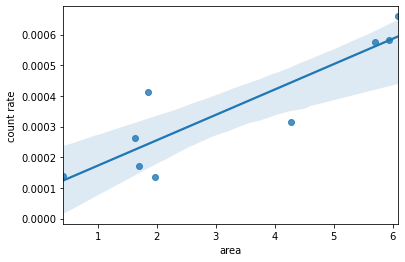

In [134]:
_ = sns.regplot(x='area',y='count rate',data=df_rate)

##  Get the scale factor of areas

In [235]:
# get the scale factor of areas
dest = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2/'
df = pd.read_csv('/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/solid_angles.csv')
for reg in regs:
    r = 15/60.
    DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{reg}'
    test_names = [f.split('-')[0] for f in listdir(DIR) if f.startswith('0')]
    test_names = sorted(list(set(test_names)))
    areas = [df.at[reg,name] for name in test_names if name not in bad_names[reg]]
# for i in test_names:
#     DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{i}/analysis/'
#     with fits.open(path.join(DIR, 'pnS005-cheese.fits')) as hdu:    
#         header = hdu[0].header
#         x = header['CRVAL1']
#         y = header['CRVAL2']
#     circle = Point(x,y).buffer(r)
#     m=boxes[reg].intersection(circle)
#     areas.append(m.area)

    reg_area = (10/60)**2/3282.8
    scales = [area/areas[0] for area in areas]
    ratio = areas[0]/reg_area
    with open(dest+'scale-reg{}.txt'.format(reg),'wt') as f:
        print(*scales,file=f,sep='\n')
    with open(dest+'ratio-reg{}.txt'.format(reg),'wt') as f:
        print('{} : {}'.format(test_names[0],ratio),file=f)

## write grppha files

In [210]:
# write grppha files
dest = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2/'
for reg in range(100):
    DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{reg}'
    test_names = [f.split('-')[0] for f in listdir(DIR) if f.startswith('0')]
    test_names = sorted(list(set(test_names)))
    for name in test_names:
        with open(dest+f'grp-reg{reg}.sh','at') as fout:
            print(f'grppha infile="{name}-pnS005-obj-os-phs1-reg{reg}.pi" outfile="{name}-pnS005-obj-os-phs1-reg{reg}-grp.pi" comm="group min 25&chkey RESPFILE {name}-pnS005-phs1-reg{reg}.rmf&chkey ANCRFILE {name}-pnS005-phs1-reg{reg}.arf&chkey BACKFILE {name}-pnS005-back-phs1-reg{reg}.pi&exit"', file=fout)

## write backscale.sh and move.sh

In [664]:
# wt backscale


for reg in range(100):
  
  DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{reg}'
  test_names = [f.split('-')[0] for f in listdir(DIR) if f.startswith('0')]
  test_names = sorted(list(set(test_names)))
  st = ' '.join(test_names)
  if test_names:
    #print('xspec',file=fout)
    fout = open(dest+f'/backscale/backscale-reg{reg}.sh','at')
    print(f"foreach i [list {st}]", "{",file=fout)
    print(f"""
    da $i-pnS005-obj-os-phs1-reg{reg}-grp.pi

    ignore 1:0.-10. 14.-**

    tclout rate 1
    scan $xspec_tclout "%f" temp

    backgrnd none 
    tclout rate 1 
    scan $xspec_tclout "%f" sr

    backgrnd $i-pnS005-back-phs1-reg{reg}.pi

    tclout backscal 1 s
    scan $xspec_tclout "%f" sb
    tclout backscal 1 b
    scan $xspec_tclout "%f" bbo

    set br [expr ($sr-$temp)*($bbo/$sb)]
    set bb [expr $br*$sb/$sr]

    grppha infile="$i-pnS005-back-phs1-reg{reg}.pi" outfile="$i-pnS005-back-phs1-reg{reg}-new.pi" comm="CHKEY BACKSCAL $bb & exit"
    """,file=fout)
    print("}",file=fout)
    print("exit",file=fout)
    fout.close()



In [ ]:
fout = open('move.sh','at')
print(f'for i in {st}',file=fout)
print("""do
cp $name-pnS005-back-phs1-reg$i.pi /raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2/backscale/$name-pnS005-back-phs1-reg$i.pi
rm $name-pnS005-back-phs1-reg$i.pi
mv $name-pnS005-back-phs1-reg$i-new.pi $name-pnS005-back-phs1-reg$i.pi
done

""",file=fout)
fout.close()

In [130]:
dst = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/23/'
src = '/raid2/dxb/xmm/analysis/COSMOS/sicong/'
for name in test_names:
    shutil.copy2(src+f'{name}/analysis/pnS005-obj-os-phs1-reg23.pi', dst+f'{name}-pnS005-obj-os-phs1-reg23.pi')

## get temp and norm from lhb_par_phase1.csv

In [20]:
# get temp and norm
par_file='/raid2/dxb/xmm/analysis/COSMOS/sicong/rosat_maps/lhb_par_phase1.csv'
df=ascii.read(par_file,format='csv')
temps=[df[i]['T'] for i in range(100)]
norms=[df[i]['norm'] for i in range(100)]

## write fitting commands for pyxspec

In [ ]:
# write fitting commands
nh=0.026
#for reg in regs:
for reg in regs:
    DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{}'.format(reg)
    test_names = [f.split('-')[0] for f in listdir(DIR) if f.startswith('0')]
    test_names = sorted(list(set(test_names)))
    # remove bad obs
    if bad_names[reg]:
        for bad_name in bad_names[reg]:
            if bad_name in test_names:
                test_names.remove(bad_name)
    #get scale factor
    scales = [float(line) for line in open('scale-reg{}.txt'.format(reg),'r')]
    with open('ratio-reg{}.txt'.format(reg),'r') as f:
        ratio = float(f.readline().split(':')[1])
    #open log
    logfile = Xset.openLog("reg{}_fixed_t.log".format(reg))
    for i in range(len(test_names)):
        AllData += "{}-pnS005-obj-os-phs1-reg{}-grp.pi".format(test_names[i],reg)
    #get spectra in groups
    expr = '1:1 {}-pnS005-obj-os-phs1-reg{}-grp.pi'.format(test_names[0],reg)
    for i in range(1,len(test_names)):
        expr = expr + ' {}:{} {}-pnS005-obj-os-phs1-reg{}-grp.pi'.format(i+1,i+1,test_names[i],reg)
        
    AllData(expr)
    AllData.ignore("0.-0.5 1.3-1.75 7.-**")
    
    #set fitting pars    
    par_dict = {1:temps[reg], 4:norms[reg]*ratio, 5:nh, 6:0.14857767647058823, 10:1.85}
    m1 = Model("apec+wabs*(apec+po)", setPars=par_dict)
    m1(1).frozen=True
    m1(4).frozen=True
    m1(5).frozen=True
    m1(6).frozen=True
    
    p4 = m1(4)
    p6 = m1(6)
    p9 = m1(9)
    p10 = m1(10)
    p11 = m1(11)
    
    if len(test_names) > 1:
        for i in range(1,len(test_names)):
            m = AllModels(i+1) 
        
#         m(1).values = m1(1).values[0]
            m(4).values = scales[i]*p4.values[0]
#         m(5).values = m1(5).values[0]
#         m(6).link = "1 * p6"
            m(9).link = "{} * p9".format(scales[i])
#         m(10).link = "1 * m1(10)"
            m(11).link = "{} * p11".format(scales[i])
        
        #m(1).frozen=True
            m(4).frozen=True
        #m(5).frozen=True
    
    Fit.query="yes"
    Fit.perform()
    AllData.clear()
    AllModels.clear()
    Xset.closeLog()   
    


In [ ]:
with open('xspec.log') as f:
    lines=f.readlines()
with open('result.txt','at') as fout:
    for i in range(len(lines)):
        if 'Spectral Data File' in lines[i]:
            print(lines[i],end='',file=fout)
        if 'Covariance Matrix' in lines[i]:
            print(*lines[i+12:i+23],end='',file=fout)
            print(lines[i+29],end='',file=fout)

In [236]:
print(*names)

0203360101 0203360201 0203360301 0203360401 0203360501 0203360601 0203360701 0203360801 0203360901 0203361001 0203361101 0203361201 0203361301 0203361401 0203361501 0203361601 0203361701 0203361801 0203361901 0203362001 0203362101 0203362201 0203362301 0203362401 0203362501 0302350101 0302350201 0302350301 0302350401 0302350501 0302350601 0302350701 0302350801 0302350901 0302351001 0302351101 0302351201 0302351301 0302351401 0302351501 0302351601 0302351701 0302351801 0302351901 0302352001 0302352201 0302352301 0302352501 0302353001 0302353101 0302353201 0302353301 0302353401 0501170101 0501170201


# read fitting parameters for individual spectra fitting

In [89]:
# em for individual spectra
ems, inds, kts, pnorms = [], [], [], []
ems_err, inds_err, kts_err, pnorms_err = [], [], [], []
reg_area = (10/60)**2/3282.8
DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2/'
for reg in regs:
    with open(path.join(DIR,f'reg{reg}_fixed_t.log')) as f:
        lines = f.readlines()
    for i in range(len(lines)):
        if 'Covariance Matrix' in lines[i]:
#             if 'kT' in lines[i+18]:
#                 kt = float(lines[i+18].split()[5])
#                 kte = float(lines[i+18].split()[7])
#             elif 'kT' in lines[i+17]:
#                 kt = float(lines[i+17].split()[5])
#                 kte = float(lines[i+17].split()[7])
#             elif 'kT' in lines[i+16]:
#                 kt = float(lines[i+16].split()[5])
#                 kte = float(lines[i+16].split()[7])
#             else:
#                 print('Temperature check',reg)
#                 kt = 0
#                 kte = 0
                
            if 'norm' in lines[i+21]:
                norm = float(lines[i+21].split()[4])
                norme = float(lines[i+21].split()[6])
            elif 'norm' in lines[i+20]:
                norm = float(lines[i+20].split()[4])
                norme = float(lines[i+20].split()[6])
            elif 'norm' in lines[i+19]:
                norm = float(lines[i+19].split()[4])
                norme = float(lines[i+19].split()[6])
            else:
                print('EM check',reg)
                norm = 0
                norme = 0
            
            if 'PhoIndex' in lines[i+22]:
                ind = float(lines[i+22].split()[4])
                inde = float(lines[i+22].split()[6])
            elif 'PhoIndex' in lines[i+21]:
                ind = float(lines[i+21].split()[4])
                inde = float(lines[i+21].split()[6])
            elif 'PhoIndex' in lines[i+20]:
                ind = float(lines[i+20].split()[4])
                inde = float(lines[i+20].split()[6])
            else:
                print('Index check',reg)
                ind = 0
                inde = 0
                
            if 'powerlaw   norm' in lines[i+23]:
                pnorm = float(lines[i+23].split()[4])
                pnorme = float(lines[i+23].split()[6])
            elif 'powerlaw   norm' in lines[i+22]:
                pnorm = float(lines[i+22].split()[4])
                pnorme = float(lines[i+22].split()[6])
            elif 'powerlaw   norm' in lines[i+21]:
                pnorm = float(lines[i+21].split()[4])
                pnorme = float(lines[i+21].split()[6])
            else:
                print('PNorm check',reg)
                pnorm = 0
                pnorme = 0
    with open(path.join(DIR,f'ratio-reg{reg}.txt')) as f:
        line = f.readline()
        ratio = float(line.split(':')[1])
    
    #kts.append(kt)
    em = norm/2451/(reg_area*ratio)
    ems.append(em)
    inds.append(ind)
    pn = pnorm/ratio
    pnorms.append(pn)
    
    #kts_err.append(kte)
    eme = norme/2451/(reg_area*ratio)
    ems_err.append(eme)
    inds_err.append(inde)
    pne = pnorme/ratio
    pnorms_err.append(pne)
    
    if em > 0.01:
        print('EM',reg,em)
ems = np.array(ems)
inds = np.array(inds)
#kts = np.array(kts)
pnorms = np.array(pnorms)

ems_err = np.array(ems_err)
inds_err = np.array(inds_err)
#kts_err = np.array(kts_err)
pnorms_err = np.array(pnorms_err)

#print('kT:')
#print('mean:',np.mean(kts),'std:', np.std(kts),'max:',np.amax(kts),'min:',np.amin(kts),'combined error:',combine_error(kts_err))
print('EM:')
print('mean:',np.mean(ems),'std:', np.std(ems),'max:',np.amax(ems),'min:',np.amin(ems),'combined error:',combine_error(ems_err))
print('PhoIndex:')
print('mean:',np.mean(inds),'std:', np.std(inds),'max:',np.amax(inds),'min:',np.amin(inds),'combined error:',combine_error(inds_err))
print('powerlaw norm:')
print('mean:',np.mean(pnorms),'std:', np.std(pnorms),'max:',np.amax(pnorms),'min:',np.amin(pnorms),'combined error:',combine_error(pnorms_err))

EM 6 0.010882852405610823
EM:
mean: 0.004672429181713324 std: 0.001472578237862579 max: 0.010882852405610823 min: 0.00016918421864676737 combined error: 0.00011250417045777906
PhoIndex:
mean: 2.0412598588235293 std: 0.6133528750064949 max: 5.79332 min: 0.796023 combined error: 0.04485951410067605
powerlaw norm:
mean: 7.898329053632524e-05 std: 4.01310083254232e-05 max: 0.00023080190556703468 min: 1.7817199107474207e-05 combined error: 7.87199140191334e-07


In [178]:
nums = [int(line.split(':')[1][4:6]) for line in open(path.join(DIR,'result.txt')) if 'Spectral Data File' in line]
for reg in regs:
    if reg not in nums:
        print(reg)

In [81]:
test_arr = np.array([1,2,-1])

85

# Read reduced chi square for individual spectral fitting

In [45]:
DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2/'
new_chi = []

for reg in regs:
    with open(DIR+f'/reg{reg}_fixed_t.log') as f:
        last_line = f.readlines()[-2]
        chi = float(last_line[last_line.index("=")+1:last_line.index("for")].strip())
    #print(f'{reg}:{chi}')
    new_chi.append(chi)
d = {'chi2':new_chi}
df_chi = pd.DataFrame(d,index=regs)
df_chi.sort_values(by=['chi2'],ascending=False)

,chi2
38,1.30800
39,1.21800
47,1.20860
45,1.20754
74,1.20360
85,1.18290
66,1.18250
75,1.18020
25,1.17900
92,1.17900


# Histograms for individual spectral fitting

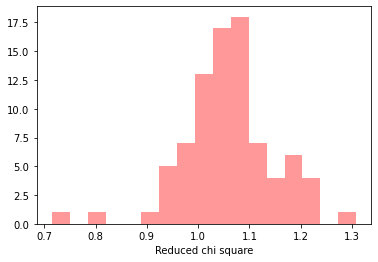

In [46]:
sns.distplot(a=np.array(new_chi),axlabel='Reduced chi square',kde=False,color='red');

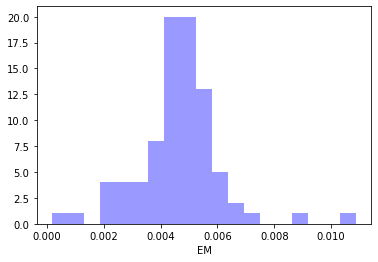

In [52]:
sns.distplot(a=ems,axlabel='EM',kde=False,color='blue');

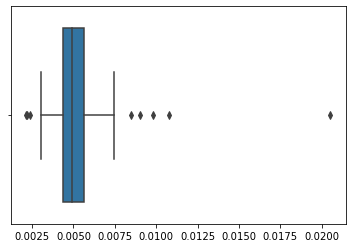

In [608]:
ax = sns.boxplot(x=ems)

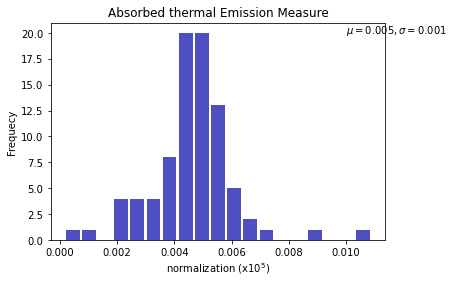

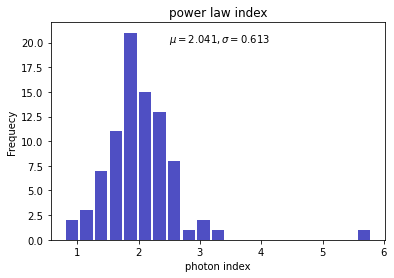

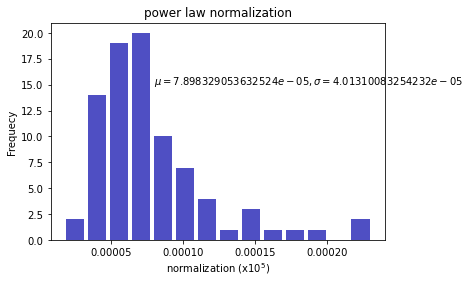

In [55]:
#temperature
# n, bins, patches = plt.hist(x=kts, bins='auto', color='#0504aa',
#                             alpha=0.7, rwidth=0.85)
#plt.xlabel('temperature (keV)')
# plt.ylabel('Frequecy')
# plt.title('Absorbed thermal temperature')
# plt.text(0.1,15,f'$\mu={{{np.average(kts):.3f}}}, \sigma={{{np.std(kts):.3f}}}$')
# plt.show();

#ems
n, bins, patches = plt.hist(x=ems, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('normalization (x10$^5$)')
plt.ylabel('Frequecy')
plt.title('Absorbed thermal Emission Measure')
plt.text(0.01,20,f'$\mu={{{np.average(ems):.3f}}}, \sigma={{{np.std(ems):.3f}}}$')
plt.show();

#power law index
n, bins, patches = plt.hist(x=inds, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('photon index')
plt.ylabel('Frequecy')
plt.title('power law index')
plt.text(2.5,20,f'$\mu={{{np.average(inds):.3f}}}, \sigma={{{np.std(inds):.3f}}}$')
plt.show();

#power law normalization
n, bins, patches = plt.hist(x=pnorms, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('normalization (x10$^5$)')
plt.ylabel('Frequecy')
plt.title('power law normalization')
plt.text(8e-5,15,f'$\mu={{{np.average(pnorms)}}}, \sigma={{{np.std(pnorms)}}}$')
plt.show();

## standardize

In [56]:
#kts_sd = standardize(kts)
ems_sd = standardize(ems)
inds_sd = standardize(inds)
pnorms_sd = standardize(pnorms)

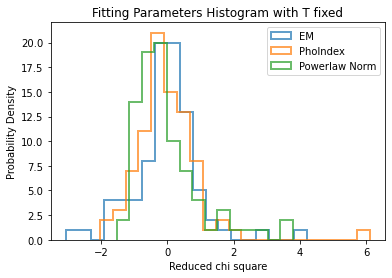

In [76]:
#plt.hist(x=np.array(kts_sd), bins='auto', alpha=0.7, lw=2, label='kT',histtype='step',density=False)
plt.hist(x=np.array(ems_sd), bins='auto', alpha=0.7, lw=2, label='EM',histtype='step',density=False)
plt.hist(x=np.array(inds_sd), bins='auto', alpha=0.7, lw=2, label='PhoIndex',histtype='step',density=False)
plt.hist(x=np.array(pnorms_sd), bins='auto', alpha=0.7, lw=2, label='Powerlaw Norm',histtype='step',density=False)
plt.legend()
#plt.figure(figsize=(24,24))
plt.xlabel('Reduced chi square')
plt.ylabel('Probability Density')
plt.title('Fitting Parameters Histogram with T fixed')
plt.show();

# Heatmap

## get values and texts for heatmap

In [73]:
values, texts = heatmap_values(regs=regs,z=pnorms)

In [21]:
texts

array([['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
       ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
       ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29'],
       ['30', '31', '32', '33', '34', '35', '36', '37', '38', '39'],
       ['40', '41', '42', '43', '44', '45', '46', '47', '48', '49'],
       ['50', '51', '52', '53', '54', '55', '56', '57', '58', '59'],
       ['60', '61', '62', '63', '64', '65', '66', '67', '68', '69'],
       ['70', '71', '72', '73', '74', '75', '76', '77', '78', '79'],
       ['80', '81', '82', '83', '84', '85', '86', '87', '88', '89'],
       ['90', '91', '92', '93', '94', '95', '96', '97', '98', '99']],
      dtype=object)

## get ra,dec for each region

In [22]:
region_file = '/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/region_radec_phs1.reg'
ras = list(set([format(float(line.split()[0]), '.2f') for line in open(region_file)]))
ras.sort()
decs = list(set([format(float(line.split()[1]), '.2f') for line in open(region_file)]))
decs.sort()

In [23]:
ras

['149.37',
 '149.53',
 '149.70',
 '149.87',
 '150.03',
 '150.20',
 '150.37',
 '150.53',
 '150.70',
 '150.87']

In [24]:
decs

['1.47',
 '1.63',
 '1.80',
 '1.97',
 '2.13',
 '2.30',
 '2.47',
 '2.63',
 '2.80',
 '2.97']

## plot the heatmap

In [74]:
heatmap_plot(values=values,ras=ras,decs=decs,
             #title='Absorbed Thermal Component Emission Measure (cm<sup>-6</sup>) with temperture fixed = 0.148keV',
             title='Powerlaw Norm with temperture fixed = 0.148keV',
             xaxis='RA',yaxis='DEC')

## plot annotated heatmap

In [663]:
values, texts = heatmap_values(regs=regs,z=new_chi)
annotated_heatmap(values=values,texts=texts,ras=ras,decs=decs,
                  title='Reduced Chi Square',xaxis='RA',yaxis='DEC')

## copy heatmap image

In [75]:
src = '/home/sicong/Downloads/'
dest = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2'
shutil.move(path.join(src,'newplot.png'), path.join(dest,'pnorm_fixed_t_phase2.png'))

'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase2/pnorm_fixed_t_phase2.png'

In [30]:
%whos 

Variable            Type                          Data/Info
-----------------------------------------------------------
DIR                 str                           /raid2/dxb/xmm/analysis/C<...>SMOS/sicong/xspec/phase2/
Gaussian2DKernel    type                          <class 'astropy.convoluti<...>ernels.Gaussian2DKernel'>
Point               type                          <class 'shapely.geometry.point.Point'>
annotated_heatmap   function                      <function annotated_heatmap at 0x7f861e4f03a0>
ascii               module                        <module 'astropy.io.ascii<...>py/io/ascii/__init__.py'>
attrgetter          type                          <class 'operator.attrgetter'>
bad_names           dict                          n=100
bad_regs            list                          n=9
box                 function                      <function box at 0x7f863c2d8ee0>
convolve            function                      <function convolve at 0x7f861f33fee0>
decs           